# 1. Import Libraries

In [56]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix ,precision_score, recall_score, roc_auc_score ,roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 2. Load Data  
- 확인필요(open-binary에서 -1로 분류된 데이터는 제외해야하지 않을까요??)

In [45]:
unmon_features= pd.read_csv('../features/modified_datasets/unmon_features.csv')
mon_features= pd.read_csv('../features/modified_datasets/mon_features.csv')
mon_labels = pd.read_csv('../features/modified_datasets/mon_labels.csv')


# 3. Preprocess Data


In [46]:
mon_features = mon_features[['total_num', 'total_sum_dir', 'inpkt_num', 'inpkt_avg_ordering',
       'inpkt_std_ordering', 'outpkt_num', 'outpkt_avg_ordering',
       'outpkt_std_ordering', 'inpkt_count_burst', 'outpkt_count_burst']]
unmon_features = unmon_features[['total_num', 'total_sum_dir', 'inpkt_num', 'inpkt_avg_ordering',
       'inpkt_std_ordering', 'outpkt_num', 'outpkt_avg_ordering',
       'outpkt_std_ordering', 'inpkt_count_burst', 'outpkt_count_burst']]

In [47]:
mon_features['label'] = mon_labels.values
unmon_features['label'] = -1

combined_data = pd.concat([mon_features, unmon_features], axis=0, ignore_index= True)
combined_data.fillna(0, inplace=True)

X = combined_data.drop('label', axis=1)
y = combined_data['label']

In [48]:
labeled_idx = range(19000) 
unlabeled_idx = range(19000, 29000)
X_labeled = X.iloc[labeled_idx]
y_labeled = y.iloc[labeled_idx]
X_unlabeled = X.iloc[unlabeled_idx]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_labeled, y_labeled, test_size=0.2, random_state=42)
print("Train/Test Shape:", X_train.shape, X_test.shape)

Train/Test Shape: (15200, 10) (3800, 10)


In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_unlabeled_scaled = scaler.transform(X_unlabeled)

---

In [30]:
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

In [52]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(95, 95))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.7294736842105263
Precision: 0.7255229281257903
Recall: 0.7323176683036778

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.71        42
           1       0.58      0.52      0.55        42
           2       0.80      0.91      0.85        35
           3       0.72      0.90      0.80        29
           4       0.63      0.92      0.75        39
           5       0.93      0.89      0.91        45
           6       0.79      0.77      0.78        44
           7       0.67      0.83      0.74        36
           8       0.68      0.76      0.72        34
           9       0.53      0.68      0.59        31
          10       0.84      0.66      0.74        47
          11       0.77      0.69      0.73        35
          12       0.84      0.88      0.86        42
          13       0.59      0.47      0.53        40
          14       0.54      0.58      0.56        36
          15       0.69 

# 5. Hyperparameter Tuning

In [ ]:
#하이퍼파라미터 튜닝(GridSearch)
param_dist = {
    'n_estimators': [100, 300, 500, 1000],
    'max_depth': [10, 20, 30, None],
    'max_leaf_nodes': [50, 100, 200, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'class_weight': ['balanced', 'balanced_subsample']
}
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=50,  # 탐색할 하이퍼파라미터 조합 수
    scoring='accuracy',  # 평가 지표
    cv=3,  # 교차 검증 분할 수
    verbose=2,  # 진행 상황 출력
    random_state=42,  # 재현 가능성을 위해 설정
    n_jobs=-1  # 병렬 처리
)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END class_weight=balanced, max_depth=10, max_leaf_nodes=100, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   3.6s
[CV] END class_weight=balanced, max_depth=10, max_leaf_nodes=100, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   3.6s
[CV] END class_weight=balanced, max_depth=10, max_leaf_nodes=100, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   3.8s
[CV] END class_weight=balanced_subsample, max_depth=20, max_leaf_nodes=100, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   4.0s
[CV] END class_weight=balanced_subsample, max_depth=20, max_leaf_nodes=100, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   4.1s
[CV] END class_weight=balanced, max_depth=20, max_leaf_nodes=200, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   4.3s
[CV] END class_weight=balanced, max_depth=20, max_le

/Users/minseokim/miniconda/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END class_weight=balanced_subsample, max_depth=30, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=  10.1s
[CV] END class_weight=balanced_subsample, max_depth=30, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=  10.3s
[CV] END class_weight=balanced_subsample, max_depth=30, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=  10.2s
[CV] END class_weight=balanced_subsample, max_depth=None, max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  17.2s
[CV] END class_weight=balanced_subsample, max_depth=30, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  34.4s
[CV] END class_weight=balanced_subsample, max_depth=30, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  34.4s
[CV] END class_weight=balanced_subsample, max_depth=30, max_leaf_nodes

In [60]:

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(95, 95))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Best Parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_leaf_nodes': None, 'max_depth': 20, 'class_weight': 'balanced'}
Best Score: 0.7073028498005655

Accuracy: 0.716842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.71      0.73        42
           1       0.62      0.50      0.55        42
           2       0.83      0.86      0.85        35
           3       0.75      0.83      0.79        29
           4       0.64      0.95      0.76        39
           5       0.93      0.91      0.92        45
           6       0.82      0.82      0.82        44
           7       0.62      0.83      0.71        36
           8       0.60      0.74      0.66        34
           9       0.47      0.68      0.55        31
          10       0.88      0.64      0.74        47
          11       0.71      0.63      0.67        35
          12       0.82      0.86      0.84        42
   

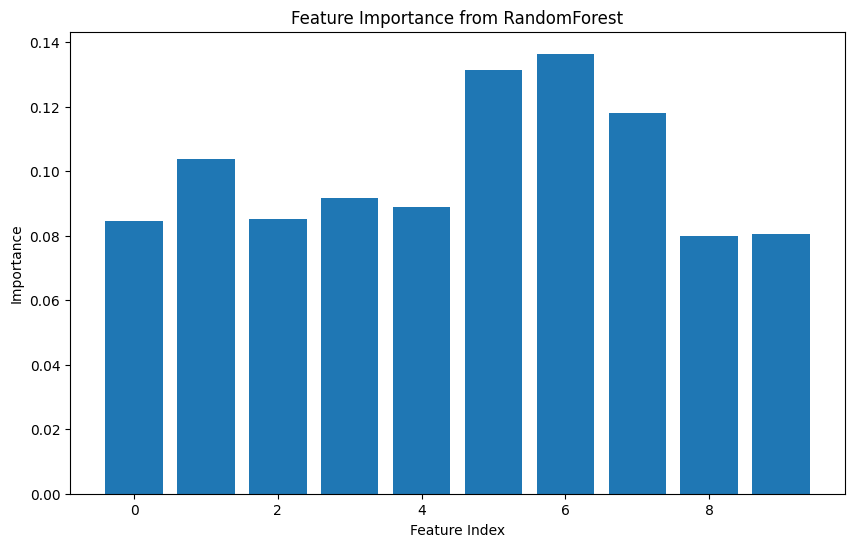

Selected Features Index: [0 1 2 3 4 5 6 7 8 9]
Number of Important Features: 10

Accuracy (Selected Features): 0.7318421052631578

Confusion Matrix (Selected Features):
 [[31  0  0 ...  0  0  0]
 [ 0 22  0 ...  0  1  0]
 [ 0  0 32 ...  0  0  0]
 ...
 [ 0  0  0 ... 27  0  0]
 [ 0  0  0 ...  0 38  0]
 [ 0  0  0 ...  0  0 23]]

Classification Report (Selected Features):
               precision    recall  f1-score   support

           0       0.70      0.74      0.72        42
           1       0.58      0.52      0.55        42
           2       0.86      0.91      0.89        35
           3       0.68      0.86      0.76        29
           4       0.67      0.95      0.79        39
           5       0.91      0.89      0.90        45
           6       0.80      0.84      0.82        44
           7       0.71      0.81      0.75        36
           8       0.64      0.74      0.68        34
           9       0.52      0.71      0.60        31
          10       0.89      0.70 

In [67]:
# 특성 중요도 확인
feature_importances = rf_model.feature_importances_

# 중요도 시각화
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, align='center')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importance from RandomForest')
plt.show()

# 중요도 기준으로 상위 N개 특성 선택
threshold = 0.07  # 중요도 기준 (조정 가능)
important_features = np.where(feature_importances >= threshold)[0]
print(f"Selected Features Index: {important_features}")
print(f"Number of Important Features: {len(important_features)}")

# 선택된 중요 특성 데이터로 새로운 학습 데이터셋 구성
X_train_selected = X_train_scaled[:, important_features]
X_test_selected = X_test_scaled[:, important_features]

# 새로운 학습 데이터로 RandomForest 학습
rf_model_selected = RandomForestClassifier(random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

# 성능 평가
y_pred_selected = rf_model_selected.predict(X_test_selected)
print("\nAccuracy (Selected Features):", accuracy_score(y_test, y_pred_selected))
print("\nConfusion Matrix (Selected Features):\n", confusion_matrix(y_test, y_pred_selected))
print("\nClassification Report (Selected Features):\n", classification_report(y_test, y_pred_selected))

In [68]:
# 성능 평가
y_pred_selected = rf_model_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
conf_matrix_selected = confusion_matrix(y_test, y_pred_selected)
print("\nAccuracy (Selected Features):", accuracy_selected)
print("\nConfusion Matrix (Selected Features):\n", conf_matrix_selected)
print("\nClassification Report (Selected Features):\n", classification_report(y_test, y_pred_selected))

# 확률 예측 (predict_proba 활용)
y_pred_proba_selected = rf_model_selected.predict_proba(X_test_selected)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_selected, pos_label=1)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
precision_values, recall_values, _ = precision_recall_curve(y_test, y_pred_proba_selected, pos_label=1)
pr_auc = auc(recall_values, precision_values)

# 최종 성능 출력
print(f"\nAccuracy (Tuned Model): {accuracy_selected:.4f}")
print(f"Confusion Matrix (Tuned Model):\n{conf_matrix_selected}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Precision-Recall AUC: {pr_auc:.4f}")



Accuracy (Selected Features): 0.7318421052631578

Confusion Matrix (Selected Features):
 [[31  0  0 ...  0  0  0]
 [ 0 22  0 ...  0  1  0]
 [ 0  0 32 ...  0  0  0]
 ...
 [ 0  0  0 ... 27  0  0]
 [ 0  0  0 ...  0 38  0]
 [ 0  0  0 ...  0  0 23]]

Classification Report (Selected Features):
               precision    recall  f1-score   support

           0       0.70      0.74      0.72        42
           1       0.58      0.52      0.55        42
           2       0.86      0.91      0.89        35
           3       0.68      0.86      0.76        29
           4       0.67      0.95      0.79        39
           5       0.91      0.89      0.90        45
           6       0.80      0.84      0.82        44
           7       0.71      0.81      0.75        36
           8       0.64      0.74      0.68        34
           9       0.52      0.71      0.60        31
          10       0.89      0.70      0.79        47
          11       0.75      0.77      0.76        35
      

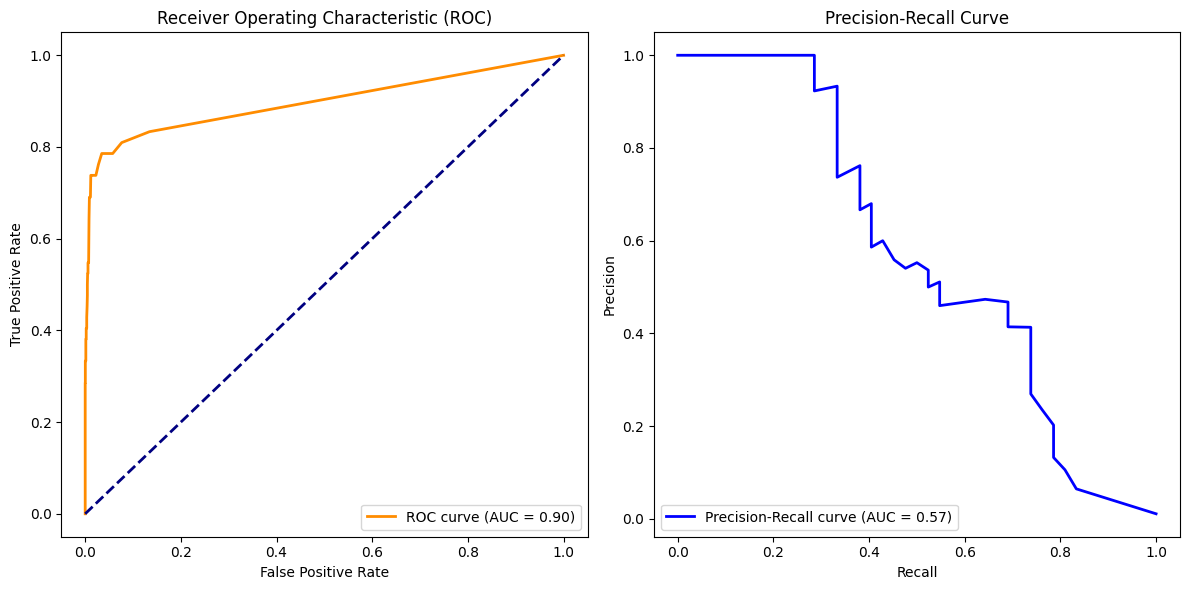

In [69]:
# Plot ROC and Precision-Recall Curves
plt.figure(figsize=(12, 6))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall_values, precision_values, color='blue', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# 6. Evaluate the Tuned Model  확인필요

In [71]:
# Predict using the best model from GridSearchCV
y_pred_random = best_rf_model.predict(X_test)

# Evaluate model performance
accuracy_best = accuracy_score(y_test, y_pred_random)
conf_matrix_best = confusion_matrix(y_test, y_pred_random)

# Compute precision and recall for positive class (assuming binary classification)
precision = precision_score(y_test, y_pred_random, average='macro')  # 'macro' for multi-class
recall = recall_score(y_test, y_pred_random, average='macro')  # 'macro' for multi-class

# Calculate ROC and Precision-Recall AUC for binary classification
fpr, tpr, _ = roc_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

precision_values, recall_values, _ = precision_recall_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1], pos_label=1)
pr_auc = auc(recall_values, precision_values)

# Print metrics
print(f"Accuracy (Tuned Model): {accuracy_best:.4f}")
print(f"Confusion Matrix (Tuned Model):\n{conf_matrix_best}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Precision-Recall AUC: {pr_auc:.4f}")

Accuracy (Tuned Model): 0.0108
Confusion Matrix (Tuned Model):
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Precision: 0.0001
Recall: 0.0105
ROC AUC: 0.4999
Precision-Recall AUC: 0.0055


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


# 7. Visualize Results  확인필요

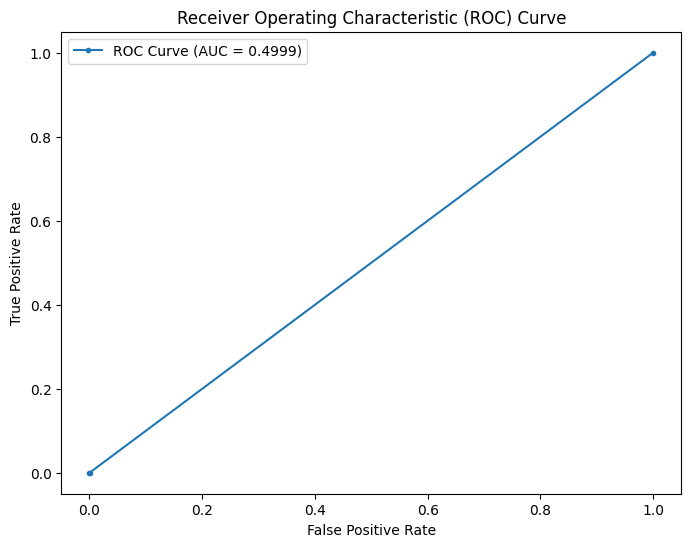

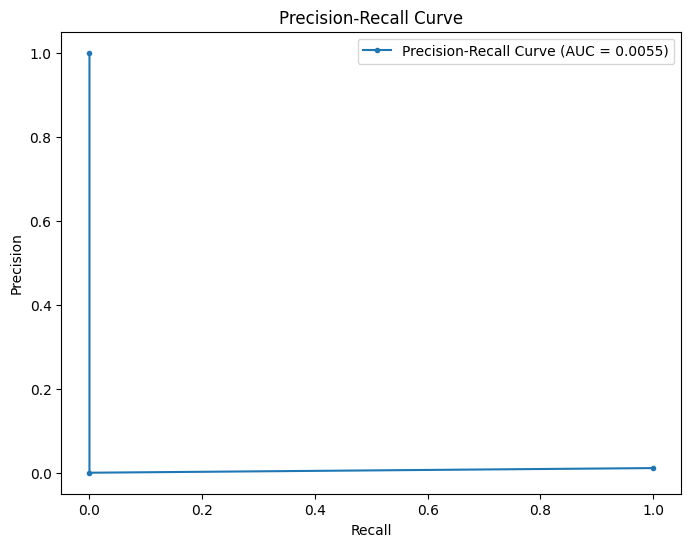

In [72]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Visualize Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_values, precision_values, marker='.', label=f"Precision-Recall Curve (AUC = {pr_auc:.4f})")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [73]:
unmon_predictions = rf_model.predict(X_unlabeled_scaled)
print("\nunmon_features Predictions:")
print(pd.Series(unmon_predictions).value_counts()) 


unmon_features Predictions:
53    232
91    226
42    212
23    208
92    196
     ... 
59     35
85     34
76     29
58     23
12     15
Name: count, Length: 95, dtype: int64


In [75]:
unmon_features['predicted_label'] = unmon_predictions
unmon_features['predicted_label'].to_csv('./open_multi_pred.csv', index=False)
